In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset

In [2]:
(x_train,y_train),(x_test,y_test) = load_data()

# Determining the shape of input image

In [3]:
x_train.shape

(60000, 28, 28)

# Reshaping the training and testing data

In [4]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_train.shape

(60000, 28, 28, 1)

# Normalizing the values of pixels of images

In [5]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

# Checking the data set

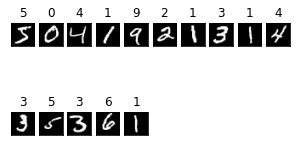

In [6]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax = fig.add_subplot(2,10,i+1,xticks = [], yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(y_train[i])


# Defining the model

In [7]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = img_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48,(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

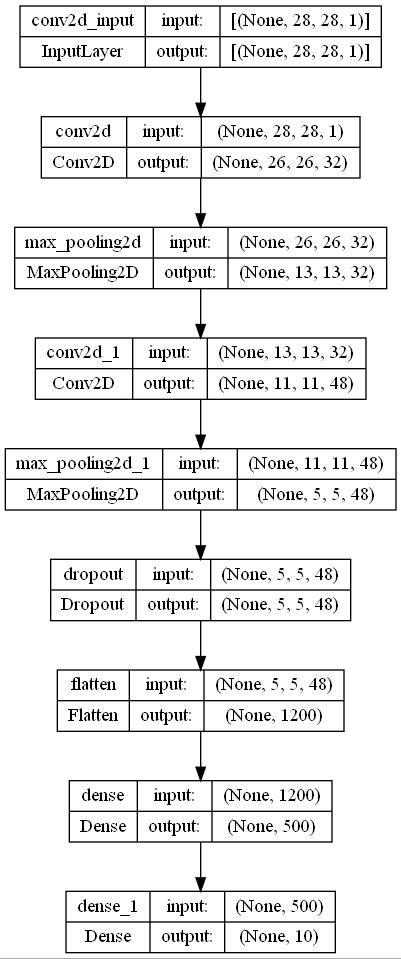

In [10]:
plot_model(model,'model.jpg',show_shapes = True)

# Train the defined model

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x= model.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 18s - loss: 0.2522 - accuracy: 0.9232 - val_loss: 0.0600 - val_accuracy: 0.9840 - 18s/epoch - 44ms/step
Epoch 2/10
422/422 - 15s - loss: 0.0852 - accuracy: 0.9735 - val_loss: 0.0417 - val_accuracy: 0.9883 - 15s/epoch - 36ms/step
Epoch 3/10
422/422 - 16s - loss: 0.0619 - accuracy: 0.9809 - val_loss: 0.0398 - val_accuracy: 0.9890 - 16s/epoch - 37ms/step
Epoch 4/10
422/422 - 15s - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0307 - val_accuracy: 0.9913 - 15s/epoch - 36ms/step
Epoch 5/10
422/422 - 15s - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0277 - val_accuracy: 0.9925 - 15s/epoch - 36ms/step
Epoch 6/10
422/422 - 15s - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0292 - val_accuracy: 0.9915 - 15s/epoch - 36ms/step
Epoch 7/10
422/422 - 16s - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0303 - val_accuracy: 0.9905 - 16s/epoch - 37ms/step
Epoch 8/10
422/422 - 15s - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0297 - val_accuracy: 0.9922 - 15s/epoch - 36ms/step


In [13]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f"Accuracy : {accuracy*100}")

Accuracy : 99.29999709129333


# Display the image which we want to predict

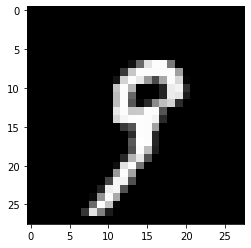

In [64]:
image = x_train[19]
plt.imshow(np.squeeze(image), cmap = 'gray')
plt.show()

# Start Predicting the image

In [65]:
image.shape

(28, 28, 1)

In [66]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = model.predict([image])
print('Predicted image is : {}'.format(argmax(p)))

1/1 [==============================] - 0s 31ms/step
Predicted image is : 9


# Checking model predicting accuracy for any outside hand written digit

In [20]:
import requests
from PIL import Image
from io import BytesIO

In [50]:
def inference(path,model):
    r = requests.get(path)
    with BytesIO(r.content) as f:
        img = Image.open(f).convert(mode = "L")
        img = img.resize((28,28))
        image = (255 - np.expand_dims(np.array(img), -1))/255.
        plt.imshow(image.squeeze(-1), cmap = "gray")
    image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
    p = model.predict([image])
    print('Predicted image is : {}'.format(argmax(p)))
    

1/1 [==============================] - 0s 31ms/step
Predicted image is : 4


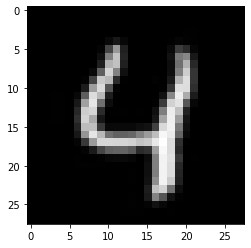

In [67]:
path = "https://th.bing.com/th/id/OIP.xpszL7jJrV5UTV7Xa-fgWQAAAA?pid=ImgDet&rs=1"
pred = inference(path,model)